In [1]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FLEXtopo import FLEXtopo

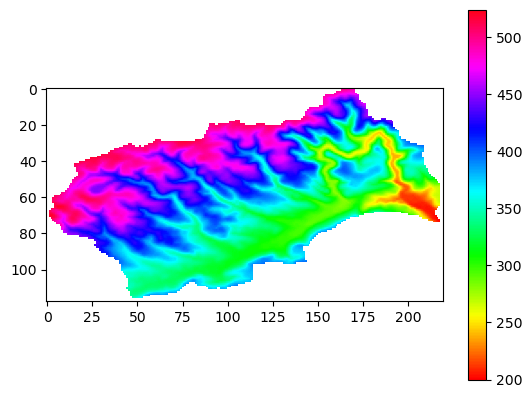

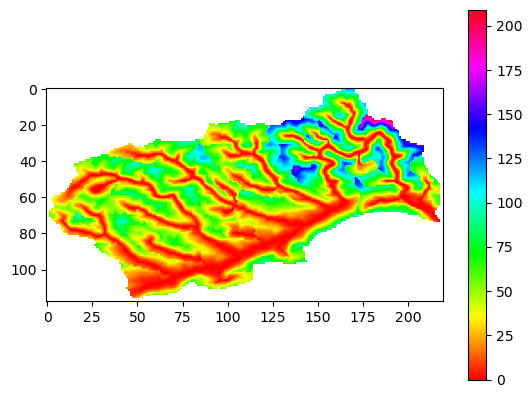

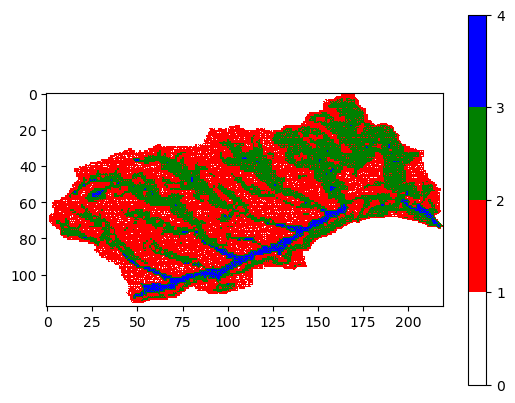

In [4]:

DEM=np.genfromtxt('wark_data/dem.asc',  dtype=float, autostrip=True)
slope=np.genfromtxt('wark_data/slope.asc',  dtype=float, autostrip=True)
hand=np.genfromtxt('wark_data/HAND.asc',  dtype=float, autostrip=True)
basin=np.genfromtxt('wark_data/basin.asc',  dtype=float, autostrip=True)

#plot DEM
plt.figure(1)
DEM[DEM==-9999]=np.nan
plt.imshow(DEM, cmap='hsv')
plt.colorbar()
 
#plot HAND
plt.figure(2)
hand[hand==-9999] = np.nan
plt.imshow(hand, cmap='hsv')
plt.colorbar()


#make landscape classification
hillslope = (np.array(slope) > 11) & (np.array(hand) > 5)
plateau = (np.array(hand) > 5) & (np.array(slope) < 11) # slope 
wetland = np.array(hand) <= 5
basin = np.array(basin) > 0

#calculate percentages
hillslope_per = float(np.sum(hillslope)) / float(np.sum(basin))
wetland_per = float(np.sum(wetland)) / float(np.sum(basin))
plateau_per = float(np.sum(plateau)) / float(np.sum(basin))


#matrics with landscape classes
landscapes=np.zeros((118,220))
landscapes[plateau]=1
landscapes[hillslope]=2
landscapes[wetland]=3

#plot landscapes
cmap = mpl.colors.ListedColormap(['white', 'red', 'green', 'blue'])
bounds=[0,1,2,3,4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(3)
plt.imshow(landscapes, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()



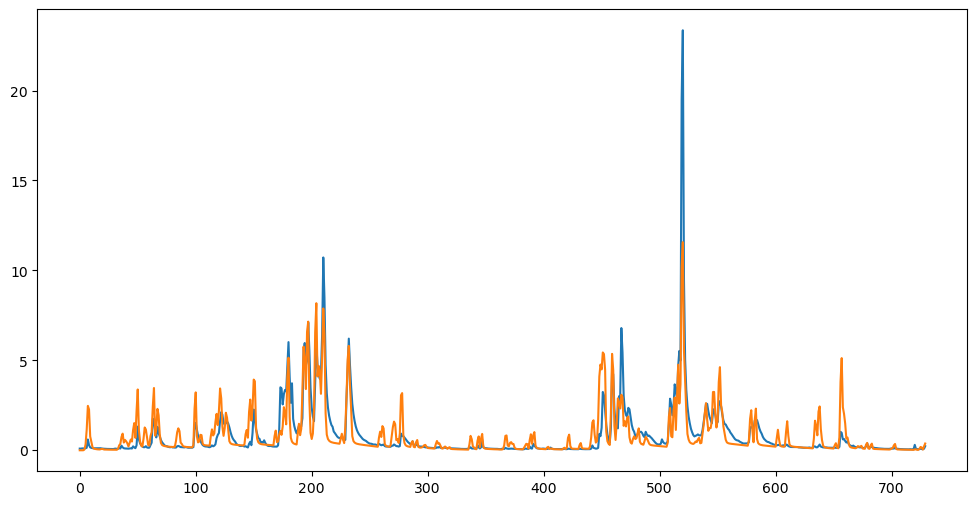

In [5]:
forcing=np.genfromtxt('wark_data/forcingWark.txt',  dtype=float, autostrip=True)

                  #      Imax Ce Sumax beta Pmax    Kf  
ParPlateau   = np.array([3.2, 0.50, 17.40, 0.95, 1.76, 0.91])   
                  #      Imax Ce Sumax beta D     Kf  
ParHillslope = np.array([3.25, 0.50, 321.99, 0.99, 0.4,0.97])
                  #      Imax Ce Sumax beta Cmax     Kf  
ParWetland   = np.array([9.94, 0.50, 53.25, 0.70, 0.65, 0.45])
              # Ks Tlag
ParCatchment = np.array([0.0281, 2.21])

#landscape percentages
landscape_per= np.array([plateau_per, hillslope_per, wetland_per])


Qm = FLEXtopo(ParPlateau, ParHillslope, ParWetland, ParCatchment, forcing[:,3:6], landscape_per)
Qo = forcing[:,3]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(0,len(Qo)),Qo)
ax.plot(range(0,len(Qm)),Qm)
